In [13]:
import pandas as pd
import numpy as np

In [2]:
# VARIABLES DEPENDIENTE DEL ENTORNO
user_code = 'u519914'
data_path = '/us/'+user_code+'/lava_iniciative/data/'

# Rutas de ficheros origen
final_dataframe_csv = data_path + 'result/final_dataframe.csv'


In [3]:
#Carga del fichero final CSV
df = pd.read_csv(final_dataframe_csv,sep=";",decimal=",").fillna(0)
print df.shape
# Elinamos la columna del indice generada al cargar desde el CSV
df = df.drop(['Unnamed: 0'], axis = 1)
print df.shape

(3185, 183)
(3185, 182)


In [4]:
#Hay un valor que no tiene informado precio.. hay que limpiarlo
df = df[df['precios']!=0]

In [5]:
from sklearn.utils import shuffle
df = shuffle(df)

# Generamos la variable a precedir en este caso vamos a probar con 25-50-25

In [6]:
y = pd.qcut(df['precios'],[0.,0.25,0.75,1],[0,1,2])
X = df.drop(['precios'], axis=1)

# Ejecucion de modelos basado en árboles

## 1. Ejecucion de un modelo basado en un arbol de decisión de 5 niveles

In [7]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [8]:
def testDecissionTree(depth=1):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X, y)
    train_score = clf.score(X, y)
    # Cross validation 10 iteraciones
    test_score = cross_val_score(clf, X, y, cv=10).mean()
    return [train_score, test_score]

In [9]:
train_line = []
test_line = []

for i in range(1,20):
    train_score, test_score = testDecissionTree(i)
    train_line += [train_score]
    test_line += [test_score]
print 'processed'

processed


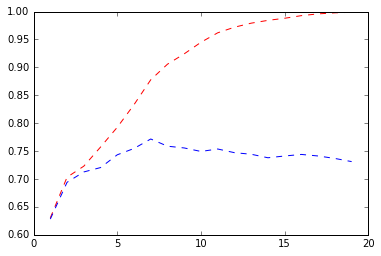

In [10]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# evenly sampled time at 200ms intervals
t = range(1,20)

# red dashes, blue squares and green triangles

plt.xlabel = 'depth'
plt.ylabel = 'score'
plt.plot(t, train_line, 'r--', t, test_line, 'b--')
plt.show()

In [11]:
# Confirmamos que en cuanto a decision tree 5 es buena profundidad
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X, y)
print "score over train Data: " 
print clf.score(X, y)
print "Cross validation 10 iteraciones"
print cross_val_score(clf, X, y, cv=10).mean()
tree.export_graphviz(clf,out_file='DecisionTree_5.dot')
# El documento generado se puede visualizar con http://www.webgraphviz.com/

score over train Data: 
0.792713567839
Cross validation 10 iteraciones
0.743370459119


Feature ranking:
1. feature 177:CBD2 (0.385915)
2. feature 176:CBD1 (0.154409)
3. feature 57:2km_colegios (0.081393)
4. feature 114:sin_estudios_perc (0.058533)
5. feature 111:edad_64_anos_perc (0.054178)
6. feature 71:2km_veterinarios (0.041687)
7. feature 82:2km_CULTURA (0.035095)
8. feature 179:CBD_min (0.034369)
9. feature 135:id_sscc (0.025689)
10. feature 126:viviendas_menos_105m2_perc (0.020370)
11. feature 61:2km_hoteles (0.018615)
12. feature 70:2km_universidades (0.017803)
13. feature 66:2km_pistas (0.017098)
14. feature 157:es_barsandrestaurants_imp (0.014103)
15. feature 127:viviendas_menos_150m2_perc (0.012528)
16. feature 131:viviendas_mas_4habitacione_perc (0.009172)
17. feature 117:estudios_tercer_grado_perc (0.007149)
18. feature 58:2km_farmacias (0.004856)
19. feature 109:edad_16anos_perc (0.003986)
20. feature 175:Tot_imp (0.003053)
21. feature 72:EDUCACION (0.000000)


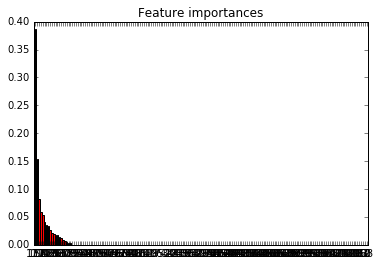

In [14]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print("%d. feature %d:%s (%f)" % (f + 1, indices[f],X.columns[indices[f]], importances[indices[f]]))
    if importances[indices[f]] < 0.0001: break

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# test zone

# Inclusión de las funciones para facilitar el tratamiento del dataframe con árboles

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
def testRandomForest(estimator=1):
    clf = RandomForestClassifier(n_estimators=estimator)
    clf = clf.fit(X, y)
    train_score = clf.score(X, y)
    # Cross validation 10 iteraciones
    test_score = cross_val_score(clf, X, y, cv=10).mean()
    return [train_score, test_score]

In [18]:
train_line = []
test_line = []

for i in range(1,30):
    train_score, test_score = testRandomForest(i)
    train_line += [train_score]
    test_line += [test_score]
print 'processed'

processed


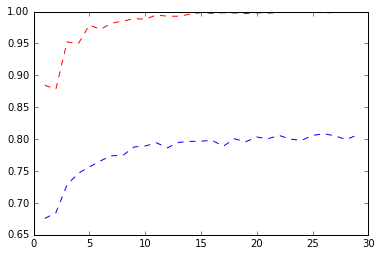

In [19]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# evenly sampled time at 200ms intervals
t = range(1,30)

# red dashes, blue squares and green triangles

plt.xlabel = 'estimator'
plt.ylabel = 'score'
plt.plot(t, train_line, 'r--', t, test_line, 'b--')
plt.show()

In [ ]:
# 9 puede ser un buen numero de estimadores

In [20]:
forest = RandomForestClassifier(n_estimators=9)
forest = forest.fit(X, y)

In [21]:
# Representación de la importancia de las variables segun el "random forest"
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d:%s (%f)" % (f + 1, indices[f],X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature 178:CBD3 (0.078641)
2. feature 177:CBD2 (0.069905)
3. feature 176:CBD1 (0.051834)
4. feature 179:CBD_min (0.030441)
5. feature 58:2km_farmacias (0.028010)
6. feature 114:sin_estudios_perc (0.025732)
7. feature 117:estudios_tercer_grado_perc (0.025248)
8. feature 115:estudios_primer_grado_perc (0.020744)
9. feature 175:Tot_imp (0.019867)
10. feature 57:2km_colegios (0.017367)
11. feature 85:2km_SERV_SALUD (0.016365)
12. feature 62:2km_monumentos (0.015384)
13. feature 84:2km_TURISMO (0.015112)
14. feature 116:estudios_segundo_grado_perc (0.014453)
15. feature 162:es_health_imp (0.014098)
16. feature 157:es_barsandrestaurants_imp (0.013797)
17. feature 135:id_sscc (0.011025)
18. feature 82:2km_CULTURA (0.010150)
19. feature 109:edad_16anos_perc (0.010129)
20. feature 127:viviendas_menos_150m2_perc (0.009827)
21. feature 125:viviendas_menos_75m2_perc (0.009711)
22. feature 61:2km_hoteles (0.009586)
23. feature 70:2km_universidades (0.009242)
24. feature 64:2km_

In [23]:
import matplotlib.pyplot as plt

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()
plt.savefig('test.png')

# *Comentarios sobre los resultados*